# Tiếp tục viết các câu lệnh trả lời các câu hỏi sau:
1. Số ngày mưa của quý I (ngày thứ 1/1/2014 đến ngày ngày 31/3/2014)?
2. Số ngày không mưa của quý I?
3. Lượng mưa trung bình của quý I bao nhiêu mm?
4. Lượng mưa lớn nhất trong quý I?
5. Lượng mưa nhỏ nhất trong quý I?
6. Tổng lượng mưa của quý I?
7. Số ngày mưa nhiều hơn lượng mưa trung bình?
8. Số ngày mưa ít hơn lượng mưa trung bình?
9. Ngày có lượng mưa nhiều nhất quý I?
10. Liệt kê những ngày có lượng mưa nhiều nhất.
11. Vẽ biểu đồ thể hiện lượng mưa của quý I.
12. Các câu hỏi tương tự cho các quý còn lại (II, III, IV).

In [20]:
import numpy as np
import pandas as pd
import matplotlib as plt

## Read data

In [31]:
data = pd.read_csv("Seattle2014.csv")
data.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140104,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140105,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STATION       365 non-null    object
 1   STATION_NAME  365 non-null    object
 2   DATE          365 non-null    int64 
 3   PRCP          365 non-null    int64 
 4   SNWD          365 non-null    int64 
 5   SNOW          365 non-null    int64 
 6   TMAX          365 non-null    int64 
 7   TMIN          365 non-null    int64 
 8   AWND          365 non-null    int64 
 9   WDF2          365 non-null    int64 
 10  WDF5          365 non-null    int64 
 11  WSF2          365 non-null    int64 
 12  WSF5          365 non-null    int64 
 13  WT01          365 non-null    int64 
 14  WT05          365 non-null    int64 
 15  WT02          365 non-null    int64 
 16  WT03          365 non-null    int64 
dtypes: int64(15), object(2)
memory usage: 48.6+ KB


In [11]:
rain = data['PRCP'].values
rain

array([  0,  41,  15,   0,   0,   3, 122,  97,  58,  43, 213,  15,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   5,   0,   0,   0,   0,
         0,  89, 216,   0,  23,  20,   0,   0,   0,   0,   0,   0,  51,
         5, 183, 170,  46,  18,  94, 117, 264, 145, 152,  10,  30,  28,
        25,  61, 130,   3,   0,   0,   0,   5, 191, 107, 165, 467,  30,
         0, 323,  43, 188,   0,   0,   5,  69,  81, 277,   3,   0,   5,
         0,   0,   0,   0,   0,  41,  36,   3, 221, 140,   0,   0,   0,
         0,  25,   0,  46,   0,   0,  46,   0,   0,   0,   0,   0,   0,
         5, 109, 185,   0, 137,   0,  51, 142,  89, 124,   0,  33,  69,
         0,   0,   0,   0,   0, 333, 160,  51,   0,   0, 137,  20,   5,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
         0,  56,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  18,  64,   0,   5,  36,  13,   0,
         8,   3,   0,   0,   0,   0,   0,   0,  18,  23,   0,   

### 1. Dựa vào mảng rain, ta có thể trả lời một số câu hỏi, chẳng hạn như: “có bao nhiêu ngày không mưa trong năm 2014?”

In [12]:
np.count_nonzero(rain==0)

215

### 2. Số ngày mưa

In [13]:
np.sum(rain>0)

150

### 3. Số ngày mưa của quý I (ngày thứ 1/1/2014 đến ngày ngày 31/3/2014)?

In [41]:
data['DATE'] = pd.to_datetime(data['DATE']).dt.date

In [42]:
data.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,1970-01-01,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,1970-01-01,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,1970-01-01,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,1970-01-01,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,1970-01-01,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


In [44]:
data.loc[data['DATE'] == '1970-01-01' and ]

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03


In [4]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

In [5]:
inches

array([0.        , 0.16141732, 0.05905512, 0.        , 0.        ,
       0.01181102, 0.48031496, 0.38188976, 0.22834646, 0.16929134,
       0.83858268, 0.05905512, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01968504, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.3503937 , 0.8503937 , 0.        ,
       0.09055118, 0.07874016, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.2007874 , 0.01968504,
       0.72047244, 0.66929134, 0.18110236, 0.07086614, 0.37007874,
       0.46062992, 1.03937008, 0.57086614, 0.5984252 , 0.03937008,
       0.11811024, 0.11023622, 0.0984252 , 0.24015748, 0.51181102,
       0.01181102, 0.        , 0.        , 0.        , 0.01968504,
       0.7519685 , 0.42125984, 0.6496063 , 1.83858268, 0.11811024,
       0.        , 1.27165354, 0.16929134, 0.74015748, 0.        ,
       0.        , 0.01968504, 0.27165354, 0.31889764, 1.09055

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

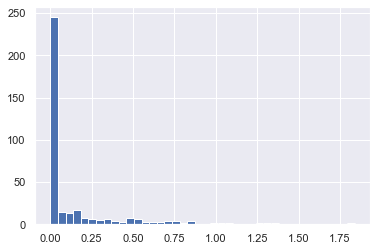

In [3]:
plt.hist(inches, 40);

In [1]:
def double_index(lst, index):
  # Checks to see if index is too big
  if index >= len(lst):
    return lst
  else:
    # Gets the original list up to index
    new_lst = lst[0:index]
 # Adds double the value at index to the new list 
  new_lst.append(lst[index]*2)
  #  Adds the rest of the original list
  new_lst = new_lst + lst[index+1:]
  return new_lst

In [2]:
print(double_index([3, 8, -10, 12], 2))

[3, 8, -20, 12]
